#**Project Name**: Grouping customers based on their purchases using K-means Algorithm

#**TASK 02**

**Description:** Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd

# **Data Importing**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/PP/TASK02PDG/Mall_Customers.csv')
print(df.shape)
print(df.head())

(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# **Data Preprocessing**

**Mapping Gender values to 0 & 1**

In [5]:
class_mapping= {'Male':0,'Female':1}
df['Gender_Bin']=df['Gender'].map(class_mapping)
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Gender_Bin  
0             0  
1             0  
2             1  
3             1

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Bin
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [7]:
df.drop(['Gender'],axis=1,inplace=True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Bin
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [8]:
df.drop(['CustomerID'],axis=1,inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Bin
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


**Checking for Null values if any**

In [9]:
# Check for missing values
missing_values = df.isna().sum()
print(missing_values)


Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Bin                0
dtype: int64


**Visualizing based on different features**

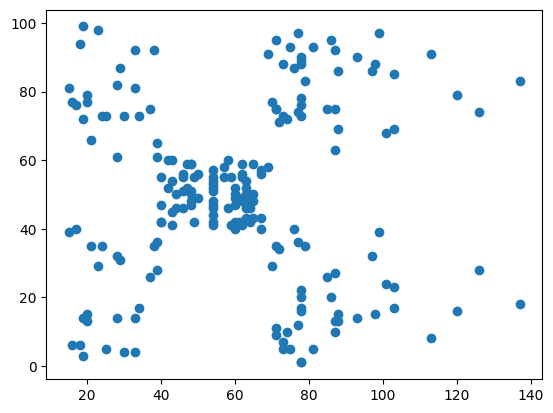

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

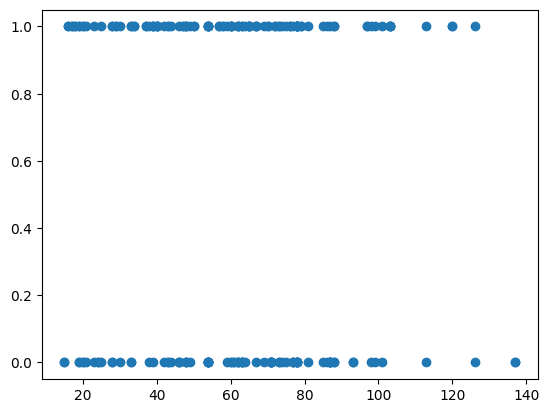

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Gender_Bin'])

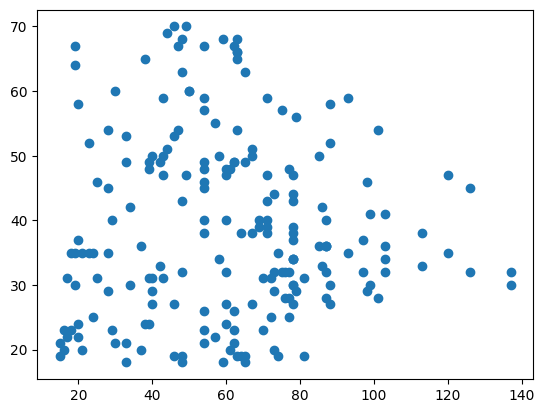

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Age'])

# **Checking for how many clusters will be there**

In [13]:
#checking number of clusters
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit_predict(df)
  kmeans.inertia_
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [14]:
wcss

[308862.06,
 212889.44245524303,
 143391.59236035674,
 104414.67534220169,
 75399.61541401484,
 58348.641363315044,
 51132.703212576904,
 44392.11566567935,
 40956.7798934218,
 37084.6755930271]

**Graph showing total clusters at L-Bow point (i.e. 4)**

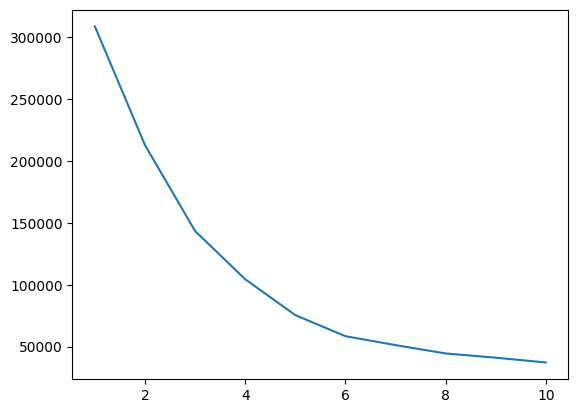

In [15]:
plt.plot(range(1,11),wcss)

In [16]:
X=df.iloc[:,:].values
kmeans=KMeans(n_clusters=4)
y_means=kmeans.fit_predict(X)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [21]:
X[y_means == 0] #Showing Datapoints which comes under cluster number 0

array([[ 23,  70,  29,   1],
       [ 43,  71,  35,   0],
       [ 59,  71,  11,   0],
       [ 47,  71,   9,   0],
       [ 25,  72,  34,   1],
       [ 20,  73,   5,   0],
       [ 44,  73,   7,   1],
       [ 19,  74,  10,   0],
       [ 57,  75,   5,   1],
       [ 28,  76,  40,   1],
       [ 25,  77,  12,   0],
       [ 48,  77,  36,   0],
       [ 34,  78,  22,   1],
       [ 43,  78,  17,   0],
       [ 44,  78,  20,   1],
       [ 47,  78,  16,   1],
       [ 37,  78,   1,   0],
       [ 34,  78,   1,   0],
       [ 56,  79,  35,   1],
       [ 19,  81,   5,   0],
       [ 50,  85,  26,   0],
       [ 42,  86,  20,   0],
       [ 36,  87,  27,   1],
       [ 40,  87,  13,   0],
       [ 36,  87,  10,   0],
       [ 52,  88,  13,   1],
       [ 58,  88,  15,   0],
       [ 59,  93,  14,   0],
       [ 37,  97,  32,   1],
       [ 46,  98,  15,   0],
       [ 41,  99,  39,   1],
       [ 54, 101,  24,   1],
       [ 41, 103,  17,   1],
       [ 34, 103,  23,   1],
       [ 33, 1

In [23]:
X[y_means == 0,0] #X[y_means == A,B] --> A is Cluster number, B is particular column of data under Cluster A

array([23, 43, 59, 47, 25, 20, 44, 19, 57, 28, 25, 48, 34, 43, 44, 47, 37,
       34, 56, 19, 50, 42, 36, 40, 36, 52, 58, 59, 37, 46, 41, 54, 41, 34,
       33, 47, 45, 32])

# **Clusters done accordingly**

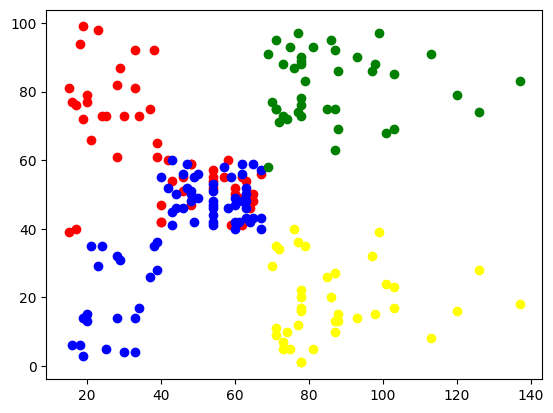

In [24]:
plt.scatter(X[y_means == 0,1],X[y_means == 0,2],color='yellow') #Taking Annual Income and Spending score
plt.scatter(X[y_means == 1,1],X[y_means == 1,2],color='red')
plt.scatter(X[y_means == 2,1],X[y_means == 2,2],color='blue')
plt.scatter(X[y_means == 3,1],X[y_means == 3,2],color='green')

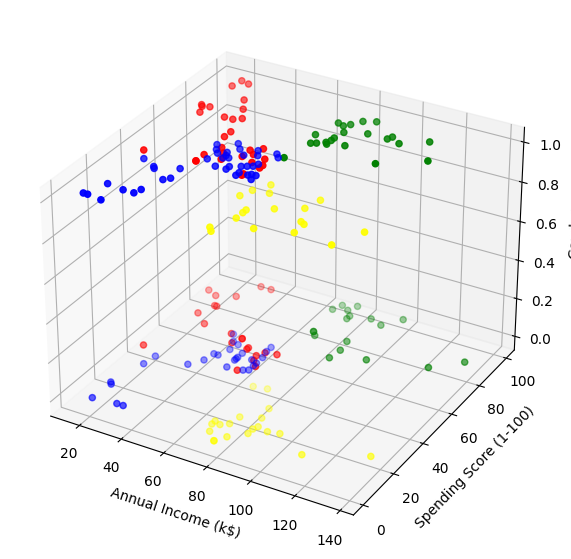

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points for each cluster
ax.scatter(X[y_means == 0, 1], X[y_means == 0, 2], X[y_means == 0, 3], color='yellow')
ax.scatter(X[y_means == 1, 1], X[y_means == 1, 2], X[y_means == 1, 3], color='red')
ax.scatter(X[y_means == 2, 1], X[y_means == 2, 2], X[y_means == 2, 3], color='blue')
ax.scatter(X[y_means == 3, 1], X[y_means == 3, 2], X[y_means == 3, 3], color='green')

# Set the labels for the axes
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Gender')

# Show the plot
plt.show()
